In [1]:
# Automatically set base path to the project directory where the notebook is running
from pathlib import Path

# This gets the directory where the current notebook is located
base_path = Path.cwd()

print(f"📂 Base path automatically set to: {base_path}")

📂 Base path automatically set to: c:\GH\ASFPM-LLM-Data-Management-Workshop


# 📊 HDF5 Data Processing with Python and ChatGPT

Welcome to **HDF5 Data Processing**! In this session, we will use **ChatGPT**, **HDF5**, and **Python** to efficiently store, manipulate, and analyze large datasets.

### Enable the Table of Contents Sidebar in Jupyter Notebook  
For easier navigation:

1. Click on **View** in Jupyter Notebook.
2. Select **Left Sidebar** click **Show Table of Contents**.

## 📌 What You Will Learn
1. Set up your computer for **Python scripting** and **HDF5 file processing**.
2. Use **ChatGPT** to generate and debug **HDF5 queries**.
3. Learn best practices for **efficient data management** with HDF5.
4. Process and analyze **HDF5 datasets** using **Python and Numpy**.

## 🛠️ Required Programs
- **Python** (Version 3.12 or later)
- **HDF5 View** (Library for hierarchical data storage)
- **h5py** (Python library for working with HDF5 files)
- **Numpy** (For reading and analyzing HDF5 data)

---

## ▶️ Run the Test Cell  
Before we begin, run the test cell below to check your setup.

This test will:
- ✅ Verify that **HDF5 (h5py)** is available.
- ✅ Check if **Pandas** is installed.
- ✅ Confirm that an **HDF5 file can be created and accessed**.




In [2]:
# Checking HDF5 and Pandas Setup

print("🔍 Checking system setup...\n")

# Test h5py (HDF5 support)
try:
    import h5py
    with h5py.File("test.hdf5", "w") as f:
        f.create_dataset("test_data", data=[1, 2, 3, 4, 5])
    print("✅ HDF5 (h5py) is available and working!")
except Exception as e:
    print(f"❌ HDF5 test failed: {e}")

# Test Pandas
try:
    import pandas as pd
    print("✅ Pandas imported successfully!")
except ImportError:
    print("❌ Pandas is not installed. Run `pip install pandas`.")

# Confirm Python version
import sys
print(f"🐍 Python version: {sys.version.split()[0]}")

print("\n✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.")


🔍 Checking system setup...

✅ HDF5 (h5py) is available and working!
✅ Pandas imported successfully!
🐍 Python version: 3.12.9

✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.


# 📊 Using ChatGPT's Code Interpreter to Explore HDF5 Data Structure

## Purpose

Use ChatGPT to help you understand and analyze HDF5 data. Before performing any analysis, it's important to understand the file structure as a reference, so ChatGPT can handle the coding, syntax, and data types and you can focus on describing the actual task you want to complete, such as mapping wsel/velocity or calculating shear stress.

## ChatGPT Prompt for HDF Explorer Function

Prompt ChatGPT:

```
Write a function that will recursively explore an HDF File path.  List all attributes, groups, datasets, compound datasets and objects.  For each, list the full path, type, data types, dataset dataspace and datatype,to ensure a complete readout of all info needed to extract data from the HDF path.  The function should be robust, comprehensive and provide information for all different data types that might be present.

Use the provided TIMDEPNC.HDF5 and RAS_Muncie.p04.hdf to test the function by reading he following paths:


TIMDEPNC.HDF5: TIMDEP OUTPUT RESULTS/

RAS_Muncie.p04.hdf: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area

```
Provide the files and work with GPT until it achieves a desirable result.  

Then, ask for a script for local execution:

```
Provide a jupyter notebook cell for my local notebook.  The HDF files are located in the same folder as the notebook, under the "Data\Hdf5\" subfolder.  
```




![ChatGPT HDF Explorer](images/chatgpt-hdfexplorer.png)
[ChatGPT Conversation for HDF Exploration](https://chatgpt.com/share/67f1ad34-2f60-8010-8381-6f3d449aa812)

In [3]:
import h5py
import os

def explore_hdf5(filepath, target_path="/", indent=0):
    """
    Recursively explores an HDF5 file and prints information about each group, dataset, and attribute.

    Parameters:
    - filepath: str, path to the HDF5 file
    - target_path: str, internal path in the HDF5 file to start exploration
    - indent: int, current indentation level for pretty printing
    """
    def print_info(name, obj, level):
        spacing = ' ' * level
        full_path = obj.name
        obj_type = type(obj).__name__
        print(f"{spacing}Path: {full_path}")
        print(f"{spacing}Type: {obj_type}")

        if isinstance(obj, h5py.Dataset):
            print(f"{spacing} - Shape: {obj.shape}")
            print(f"{spacing} - Data type: {obj.dtype}")
            try:
                print(f"{spacing} - Dataspace (dims): {obj.shape}")
                print(f"{spacing} - Datatype (HDF5 native): {obj.id.get_type().get_class()}")
            except Exception as e:
                print(f"{spacing} - Error reading dataspace/datatype: {e}")
        elif isinstance(obj, h5py.Group):
            print(f"{spacing} - Contains: {len(obj)} items")

        # Print attributes
        if obj.attrs:
            print(f"{spacing} - Attributes:")
            for key, val in obj.attrs.items():
                print(f"{spacing}   * {key}: {val}")
        print("\n")

    with h5py.File(filepath, 'r') as file:
        def recursive_visit(group, level=0):
            for key in group:
                item = group[key]
                print_info(key, item, level)
                if isinstance(item, h5py.Group):
                    recursive_visit(item, level + 2)

        root = file[target_path]
        print_info(target_path, root, indent)
        if isinstance(root, h5py.Group):
            recursive_visit(root, indent + 2)



In [4]:
# Explore the specified paths (FLO2D)
flo2d_timdepnc_file = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
print("Exploring TIMDEPNC.HDF5:\n")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/")



Exploring TIMDEPNC.HDF5:

Path: /TIMDEP OUTPUT RESULTS
Type: Group
 - Contains: 13 items
 - Attributes:
   * Grouptype: [b'Generic']


  Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
  Type: Group
   - Contains: 4 items
   - Attributes:
     * Data Type: [0]
     * DatasetCompression: [9]
     * DatasetUnits: [b'ft or m']
     * Grouptype: [b'DATASET SCALAR']
     * TimeUnits: [b'Hours']


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times
    Type: Dataset
     - Shape: (200,)
     - Data type: float64
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESU

In [5]:
# Explore the specified paths (HEC-RAS 2D)
ras_file = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
print("\nExploring RAS_Muncie.p04.hdf:\n")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area")



Exploring RAS_Muncie.p04.hdf:

Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area
Type: Group
 - Contains: 3 items


  Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations
  Type: Group
   - Contains: 18 items


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Iteration Number
    Type: Dataset
     - Shape: (289, 1)
     - Data type: int32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF5 native): 0
     - Attributes:
       * Description: b'Sum of inner-loop iterations over all outer-loop iterations'


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Max Volume Residual
    Type: Dataset
     - Shape: (289, 1)
     - Data type: float32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF

-----

# User-Guided Data Exploration of HDF5 Files 

Now that we have a detailed description of the HDF's data contents, let's build functions to extract the data.  While this detailed information is no required, it is very helpful to reduce up-front errors and iterations.  To include this information in ChatGPT, just copy the cell output and paste into ChatGPT:   


Go to the previous output cell:  
![VS Code - Copy Cell Output](images/vscode-copycelloutput.png)  
Copy the Cell Output and paste into ChatGPT

-----

## Prompt for Extracting **FLO2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/TIMDEPNC.HDF5` in HDFView

- **Water Surface Elevation Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/`, containing water surface values for each grid element over time.
- **Depth Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/FLOW DEPTH/`, containing depth values for each grid element over time.
- **Time Intervals**: Found in `TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times`, representing the time steps for the depth and velocity data.
- **X and Y Coordinates** Found in TIMDEPNC.HDF5, `/TIMDEP OUTPUT RESULTS/X-Coordinate/Values` and `/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`

Follow-up: 
`Provide a code cell for my local notebook.  The local path for the HDF5 file is Data/Hdf5/TIMDEPNC.HDF5`


1. Upload TIMDEPNC.HDF5 and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [6]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT

explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/FLOW DEPTH/")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/X-Coordinate/Values")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values")

Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION
Type: Group
 - Contains: 4 items
 - Attributes:
   * Data Type: [0]
   * DatasetCompression: [9]
   * DatasetUnits: [b'ft or m']
   * Grouptype: [b'DATASET SCALAR']
   * TimeUnits: [b'Hours']


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Maxs
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Mins
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times
  Type: Dataset
   - Shape: (200,)
   - Data type: float64
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values
  Type: Dataset
   - Shape: (200, 8588)
   - Data type: float32
   - Dataspace (dims): (200, 8588)
   - Datatype (HDF5 native): 1


Path: /TIMDE

If you don't see something similar to this output, adjust the prompt, provide corrections or try again!

![HDF-Flo2D WSE Map in ChatGPT](images/hdf-flo2d_wse_map.png)

Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step"`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

[ChatGPT Conversation - Flo2D HDF Data Extraction](https://chatgpt.com/share/67f29600-f218-8010-8a3e-42ea9300c60d)

Code Cells from these follow-up requests:

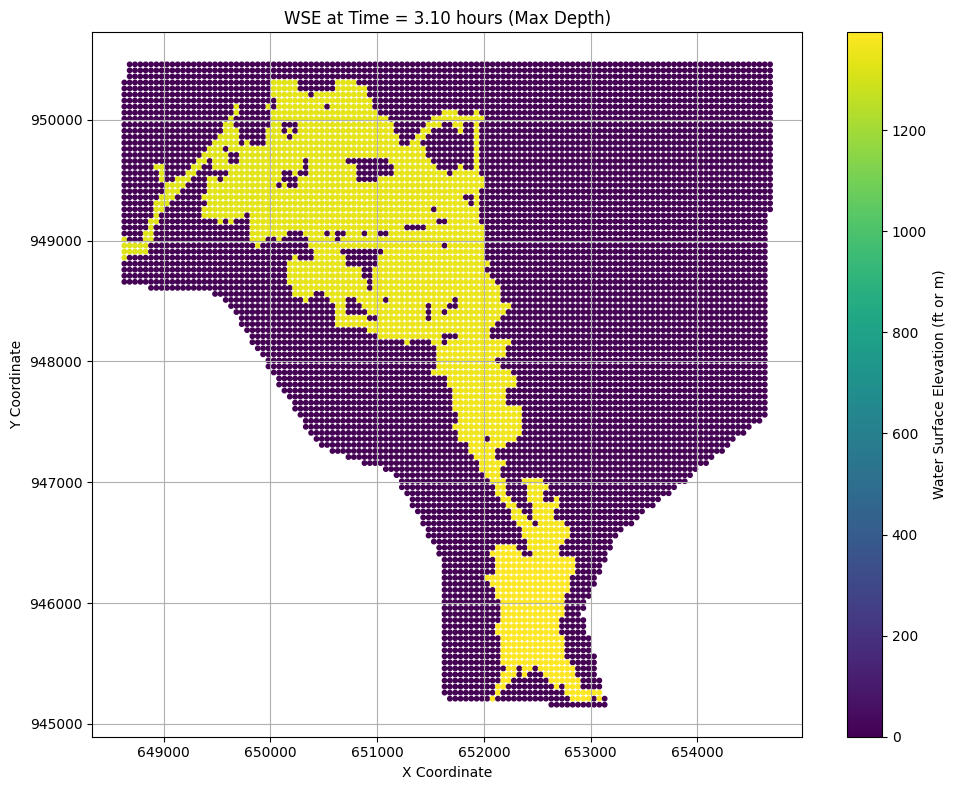

In [7]:
import h5py
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Set the local path to your HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the HDF5 file
with h5py.File(hdf5_path, "r") as f:
    # Load flow depth values and compute the timestep with maximum total depth
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    max_depth_timestep = np.argmax(np.sum(depth_values, axis=1))

    # Load water surface elevation values and time
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]

    # Load X and Y coordinates
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Create an xarray DataArray for Water Surface Elevation
wse_xr_flo = xr.DataArray(
    data=wse_values,
    dims=["time", "element"],
    coords={"time": wse_times, "x": (["element"], x_coords), "y": (["element"], y_coords)},
    name="water_surface_elevation"
)

# Extract data for the time step with maximum depth
wse_at_max_depth = wse_xr_flo.sel(time=wse_times[max_depth_timestep])

# Plot the water surface elevation at the selected time
plt.figure(figsize=(10, 8))
plt.scatter(
    wse_at_max_depth['x'],
    wse_at_max_depth['y'],
    c=wse_at_max_depth.values,
    s=10,
    cmap='viridis'
)
plt.colorbar(label='Water Surface Elevation (ft or m)')
plt.title(f"WSE at Time = {wse_at_max_depth.time.item():.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


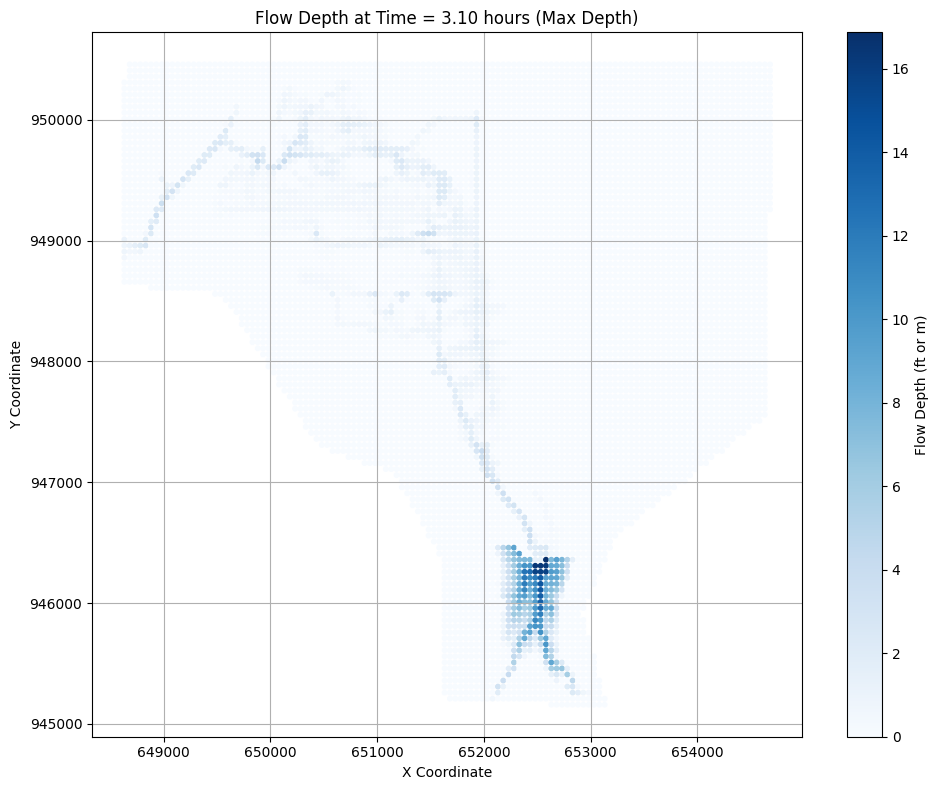

In [8]:
# Extract flow depth at the same time step (already found as max_depth_timestep)
with h5py.File(hdf5_path, "r") as f:
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Get depth data at max depth time step
depth_at_max_time = depth_values[max_depth_timestep, :]

# Plot the Flow Depth
plt.figure(figsize=(10, 8))
plt.scatter(
    x_coords,
    y_coords,
    c=depth_at_max_time,
    s=10,
    cmap='Blues'
)
plt.colorbar(label='Flow Depth (ft or m)')
plt.title(f"Flow Depth at Time = {wse_times[max_depth_timestep]:.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install packages (run only once in your notebook)
!pip install xarray matplotlib imageio --quiet

### Imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm  # Optional: for progress bar
import os

### Load the HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"
with h5py.File(hdf5_path, "r") as f:
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

### Create a folder to store frames
os.makedirs("frames", exist_ok=True)

### Generate and save each frame
filenames = []
for i in tqdm(range(len(wse_times))):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c=wse_values[i], s=10, cmap='viridis')
    plt.colorbar(label="Water Surface Elevation (ft or m)")
    plt.title(f"WSE at Time = {wse_times[i]:.2f} hrs")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()

    fname = f"frames/frame_{i:03d}.png"
    plt.savefig(fname)
    plt.close()
    filenames.append(fname)

### Create GIF
gif_path = "wse_animation_FLO2D.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### Clean up frames (optional)
for filename in filenames:
    os.remove(filename)

print(f"Animation saved as {gif_path}")

-----

## Prompt for Extracting **HEC-RAS 2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/RAS_Muncie.p04.hdf` in HDFView

- **Mesh Name Lookup**: 2D area names can be found in /Results/Unsteady/Geometry Info/2D Area(s).  Results are available for each 2D flow area, and the 2D area name is part of the path so it must be retrieved first (as a list).  In the example HDF file provided, flow_area_name is "2D Interior Area" (only one 2D area)

- **Mesh Cell Centers** can be found here: `/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate`
    
- **Time Date Stamp**: Time stamps are available at this path: `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp` Time Date Stamp is in this format: 02JAN1900 00:00:00

- **Water Surface Elevation Time Series Results**  Water Surface Elevations for each Mesh Cell are located at `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`


Instructions: 
1. Upload RAS_Muncie.p04.hdf and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [9]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT
explore_hdf5(ras_file, target_path="/Results/Unsteady/Geometry Info/2D Area(s)")
explore_hdf5(ras_file, target_path="/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface")

Path: /Results/Unsteady/Geometry Info/2D Area(s)
Type: Dataset
 - Shape: (1,)
 - Data type: |S64
 - Dataspace (dims): (1,)
 - Datatype (HDF5 native): 3


Path: /Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate
Type: Dataset
 - Shape: (5765, 2)
 - Data type: float64
 - Dataspace (dims): (5765, 2)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Plot: b'False'
   * Column: [b'X' b'Y']
   * Row: b'Cell'


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp
Type: Dataset
 - Shape: (289,)
 - Data type: |S19
 - Dataspace (dims): (289,)
 - Datatype (HDF5 native): 3


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface
Type: Dataset
 - Shape: (289, 5765)
 - Data type: float32
 - Dataspace (dims): (289, 5765)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Interpolate: b'True'
   * Can Plot: b'True'
   * Columns: b'Cells'
   * Coverage: b'Wet'
   * Location: b

Example Output from ChatGPT's Code Interpreter
![ChatGPT - HEC-RAS 2D WSE Map](images/hdf-hecras_wse_map.png)
[ChatGPT Conversation for Following Code Cells](https://chatgpt.com/share/67f2a034-5874-8010-9472-bb32f2f38252)



Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step.  Use '/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation' to calculate depth for each cell`

- `Provide a code cell for my local jupyter notebook for both WSE and Depth. The local path is Data/Hdf5/RAS_Muncie.p04.hdf`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

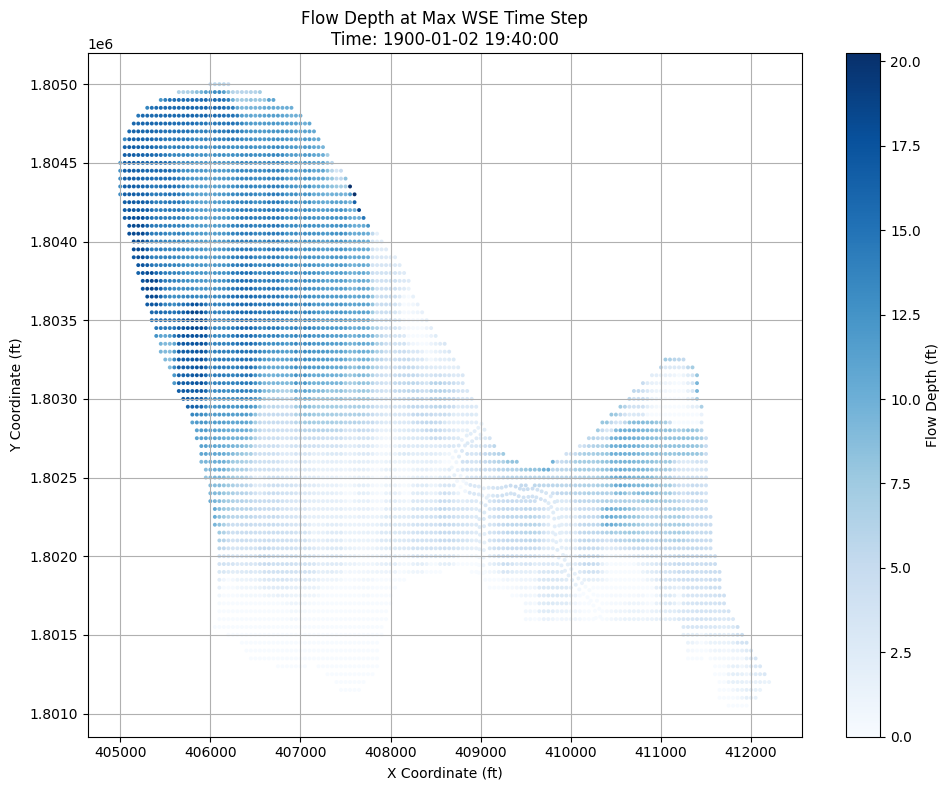

In [10]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# === Load the HDF5 file ===
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:

    # === Load datasets ===
    wse = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

# === Parse time and coordinates ===
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

# === Create xarray for WSE ===
wse_xr_ras = xr.DataArray(
    wse,
    dims=["time", "cell"],
    coords={"time": time_index, "x": ("cell", x_coords), "y": ("cell", y_coords)},
    name="water_surface_elevation",
    attrs={"units": "ft"}
)

# === Identify timestep with maximum average WSE ===
max_time_idx = wse_xr_ras.mean(dim="cell").argmax().item()
max_time = time_index[max_time_idx]
wse_at_max = wse_xr_ras.sel(time=max_time)

# === Calculate Flow Depth ===
flow_depth = wse_at_max - min_elev

# === Plot ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    wse_xr_ras["x"].values,
    wse_xr_ras["y"].values,
    c=flow_depth.values,
    cmap="Blues",
    s=8,
    edgecolor="none"
)
plt.colorbar(scatter, label="Flow Depth (ft)")
plt.title(f"Flow Depth at Max WSE Time Step\nTime: {max_time}")
plt.xlabel("X Coordinate (ft)")
plt.ylabel("Y Coordinate (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install required packages (run this in a Jupyter notebook cell)
!pip install xarray matplotlib imageio --quiet

import h5py
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

### --- Load Data ---
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:
    wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

### --- Set Up xarray ---
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

wse_xr_ras = xr.DataArray(
    wse_data,
    dims=["time", "cell"],
    coords={
        "time": time_index,
        "x": ("cell", x_coords),
        "y": ("cell", y_coords)
    },
    name="water_surface_elevation"
)

### --- Prepare Animation ---
filenames = []
vmin, vmax = np.nanmin(wse_data), np.nanmax(wse_data)  # consistent color scale

for i, t in tqdm(enumerate(wse_xr_ras.time.values), total=wse_xr_ras.sizes['time']):
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(wse_xr_ras.x, wse_xr_ras.y, c=wse_xr_ras.sel(time=t), cmap="viridis", s=8, vmin=vmin, vmax=vmax)
    plt.colorbar(sc, ax=ax, label="Water Surface Elevation (ft)")
    ax.set_title(f"WSE Time: {pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')}")
    ax.set_xlabel("X Coordinate (ft)")
    ax.set_ylabel("Y Coordinate (ft)")
    ax.grid(True)
    plt.tight_layout()

    filename = f"_frame_{i:04d}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

### --- Create GIF ---
with imageio.get_writer("wse_animation_RAS.gif", mode="I", duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### --- Cleanup PNGs ---
import os
for filename in filenames:
    os.remove(filename)

print("✅ Animation saved as wse_animation.gif")


------

# Using your Jupyter Notebook as Context to Add Functionality

For the rest of the exercise, we will use the new line of reasoning models (o1), using this notebook as context.  

Provide this notebook to any of the following models:

- ChatGPT
    - [o1](https://chatgpt.com/?model=o1)
    - [o3-mini high](https://chatgpt.com/?model=o3-mini-high)

- [Anthropic's Claude](https://claude.ai/)

- [Google's Gemini 2.5](https://aistudio.google.com/prompts/new_chat)

These are all State of the Art, Long Context Models with Reasoning Capability.  This enables longer scripts to be coded with a more consistent output and reduced errors. 

<div class="alert alert-block alert-info">
<b>Note:</b> Clear image outputs before saving and uploading.  The file size should be around 66KB.
</div>  


## OPTION 1: FLO2D: Calculate Flow x Depth and Save back to HDF

- **Objective**: Create a Python script to manipulate HDF5 file data.
- **File Path**: `Data\Hdf5\TIMDEPNC.HDF5`
- **Data Tasks**:
  - **Add Table `dep_x_vel`**: Multiply depth and velocity data.
  - **Add Table `dep_x_sqvel`**: Multiply depth by velocity squared.
- **Groups and Datasets**:
  - **Group `TIMDEP OUTPUT RESULTS/FLOW DEPTH`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
  - **Group `TIMDEP OUTPUT RESULTS/MAX VEL`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
- **Operations**:
  - **Delete Existing Datasets**: Check and delete existing datasets `dep_x_vel` and `dep_x_sqvel` if present.
  - **Calculate and Store New Data**: Compute and store new datasets for `dep_x_vel` and `dep_x_sqvel`.
- **Dependencies**: Utilize `h5py` for HDF5 interaction and `numpy` for mathematical operations.
- **Request**: Provide a Python script that executes the above operations as described.

In [11]:
# Insert Code Here

In [12]:
import h5py
import numpy as np

# Set the path to your HDF5 file
file_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the HDF5 file in read/write mode
with h5py.File(file_path, "r+") as f:
    # Access the groups containing depth and velocity values
    flow_depth_grp = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH"]
    max_vel_grp = f["/TIMDEP OUTPUT RESULTS/MAX VEL"]
    
    # Read the 'Values' datasets from each group (expected shape: (200, 8588))
    depth_values = flow_depth_grp["Values"][:]   # Depth data (float32)
    vel_values   = max_vel_grp["Values"][:]        # Velocity data (float32)
    
    # Calculate new datasets:
    # - dep_x_vel: element-wise multiplication of depth and velocity
    # - dep_x_sqvel: element-wise multiplication of depth and velocity squared
    dep_x_vel   = depth_values * vel_values
    dep_x_sqvel = depth_values * (vel_values ** 2)
    
    # Store the new datasets in the parent group '/TIMDEP OUTPUT RESULTS'
    results_grp = f["/TIMDEP OUTPUT RESULTS"]
    
    # If the datasets already exist, delete them
    if "dep_x_vel" in results_grp:
        del results_grp["dep_x_vel"]
    if "dep_x_sqvel" in results_grp:
        del results_grp["dep_x_sqvel"]
    
    # Create the new datasets with the computed values
    results_grp.create_dataset("dep_x_vel", data=dep_x_vel, dtype="float32")
    results_grp.create_dataset("dep_x_sqvel", data=dep_x_sqvel, dtype="float32")
    
    print("New datasets 'dep_x_vel' and 'dep_x_sqvel' have been created successfully.")


New datasets 'dep_x_vel' and 'dep_x_sqvel' have been created successfully.


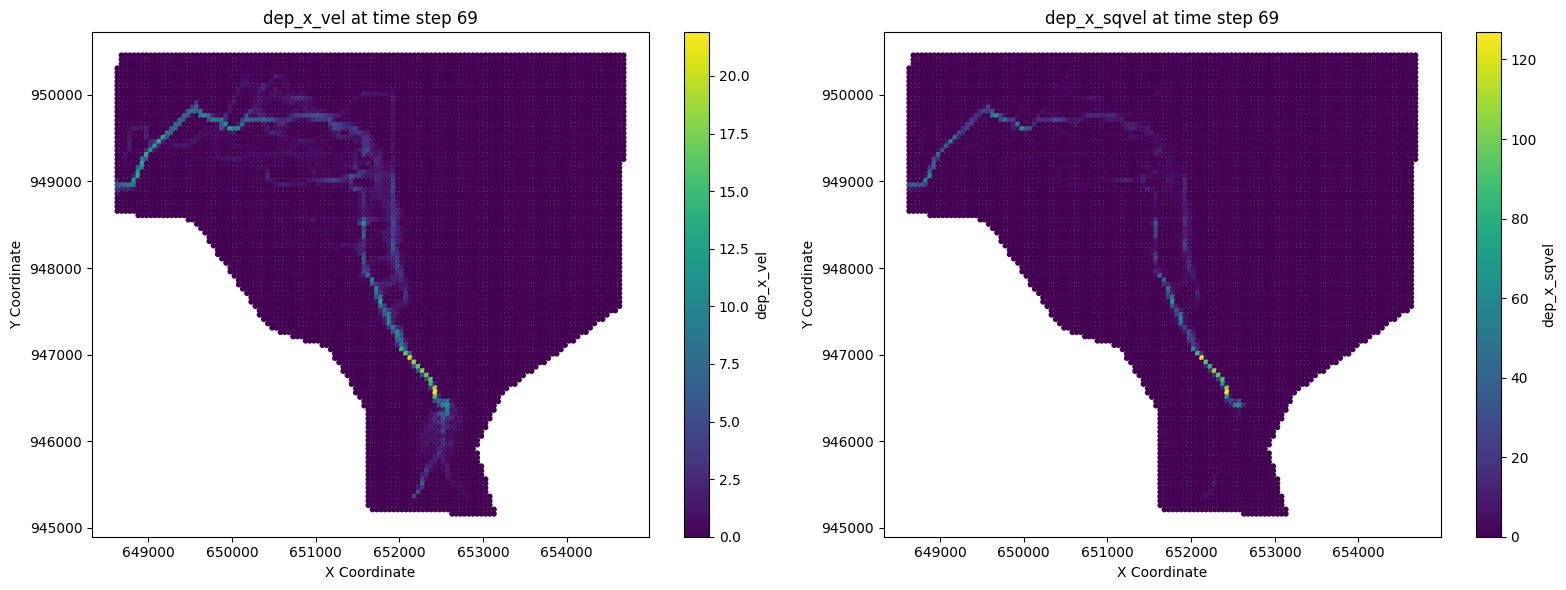

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Set the path to your HDF5 file
file_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the file in read mode to load the computed datasets and coordinate values
with h5py.File(file_path, "r") as f:
    results_grp = f["/TIMDEP OUTPUT RESULTS"]
    
    # Load the computed datasets (each of shape (200, 8588))
    dep_x_vel   = results_grp["dep_x_vel"][:]    # Depth * Velocity
    dep_x_sqvel = results_grp["dep_x_sqvel"][:]  # Depth * Velocity^2
    
    # Load the coordinate datasets (each flattened to shape (8588,))
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()
    
    # For mapping, choose a representative time step.
    # Here we compute the average of dep_x_vel across grid elements for each time step
    # and select the time step with the maximum average value.
    mean_dep_x_vel = np.mean(dep_x_vel, axis=1)
    selected_timestep = np.argmax(mean_dep_x_vel)
    
    # Extract the spatial field for the chosen time step from both datasets
    map_dep_x_vel   = dep_x_vel[selected_timestep, :]
    map_dep_x_sqvel = dep_x_sqvel[selected_timestep, :]

# Create side-by-side scatter plots for the two computed fields
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for dep_x_vel
sc1 = axes[0].scatter(x_coords, y_coords, c=map_dep_x_vel, cmap="viridis", s=10)
axes[0].set_title(f"dep_x_vel at time step {selected_timestep}")
axes[0].set_xlabel("X Coordinate")
axes[0].set_ylabel("Y Coordinate")
plt.colorbar(sc1, ax=axes[0], label="dep_x_vel")

# Plot for dep_x_sqvel
sc2 = axes[1].scatter(x_coords, y_coords, c=map_dep_x_sqvel, cmap="viridis", s=10)
axes[1].set_title(f"dep_x_sqvel at time step {selected_timestep}")
axes[1].set_xlabel("X Coordinate")
axes[1].set_ylabel("Y Coordinate")
plt.colorbar(sc2, ax=axes[1], label="dep_x_sqvel")

plt.tight_layout()
plt.show()


## OPTION 2: FLO2D Flood Wave Arrival Time

`Assuming the notebook has been run and the xarrays above are present, add a code cell for FLO2D that will find the time stamp of each grid cell, at the time where it exceeds 1ft in depth.  This indicates the first arrival of the flood wave. Create a function to find this and calculate time_to_1ft and save the daaset back to the hdf.  The function should overwrite the dataset in the hdf if it exists.  I should also plot a map of the flood wave arrival time time in hr.`

In [13]:
# Insert Code Here

Flood wave arrival times ('time_to_1ft') have been saved to the HDF5 file.


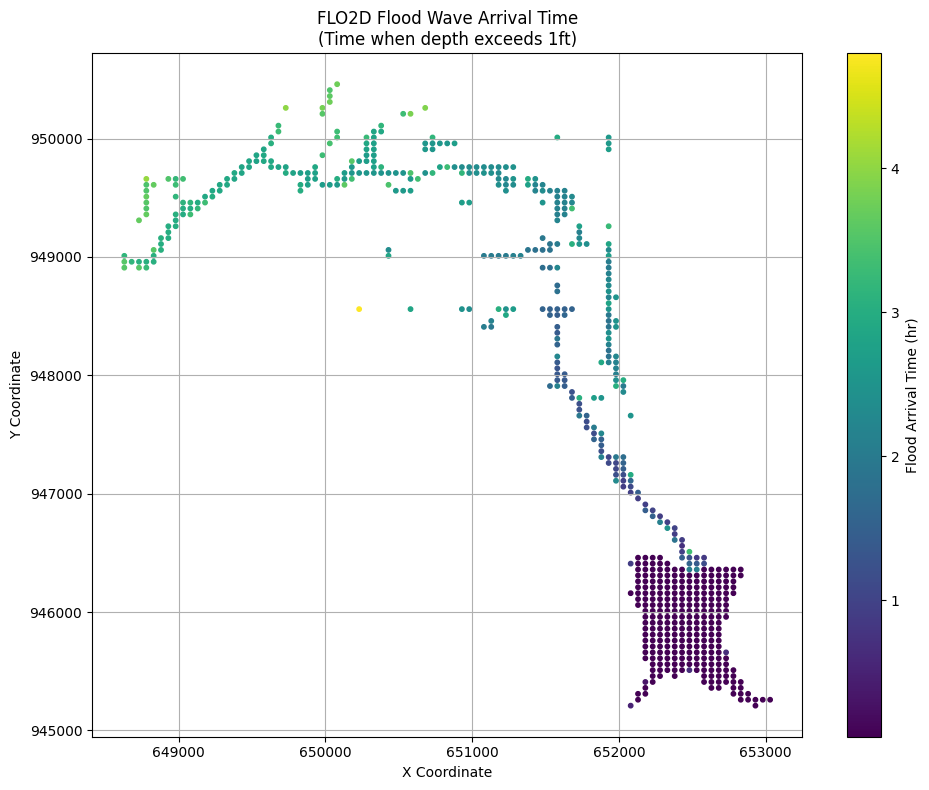

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def compute_flood_arrival_time(depth_values, time_values, threshold=1.0):
    """
    Compute the flood arrival time for each grid cell.
    For each cell (column in depth_values), find the first time (row index)
    where the depth equals or exceeds the given threshold (default 1ft).
    
    Parameters:
      depth_values : numpy.ndarray
          2D array of shape (n_time, n_cells) with depth values.
      time_values : numpy.ndarray
          1D array of shape (n_time,) containing time stamps (in hours).
      threshold : float, optional
          The depth threshold (default 1.0 ft).
    
    Returns:
      flood_times : numpy.ndarray
          1D array of length n_cells with the arrival time for each cell.
          If a cell never reaches the threshold, its value is set to np.nan.
    """
    # Boolean array: True where depth >= threshold
    condition = depth_values >= threshold  # shape (n_time, n_cells)
    n_time, n_cells = depth_values.shape
    
    # For each cell, check if any time step meets the condition
    has_arrival = condition.any(axis=0)
    # Use np.argmax to get the first True index; note: if none are True, argmax returns 0
    first_idx = np.argmax(condition, axis=0)
    
    # Initialize output array
    flood_times = np.empty(n_cells, dtype=float)
    for j in range(n_cells):
        if has_arrival[j]:
            flood_times[j] = time_values[first_idx[j]]
        else:
            flood_times[j] = np.nan  # No arrival if the threshold is never exceeded
    return flood_times

# Set the path to the FLO2D HDF5 file
file_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the file in read mode to compute the flood arrival times
with h5py.File(file_path, "r") as f:
    # Load the depth values (expected shape: (200, 8588)) and corresponding times (shape: (200,))
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    time_values  = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times"][:]
    
    # Compute flood arrival times for each grid cell
    flood_arrival_times = compute_flood_arrival_time(depth_values, time_values, threshold=1.0)
    
    # Also load spatial coordinates for plotting (flatten to 1D arrays)
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Open the file in read/write mode to save the new dataset
with h5py.File(file_path, "r+") as f:
    results_grp = f["/TIMDEP OUTPUT RESULTS"]
    
    # Delete the dataset if it already exists
    if "time_to_1ft" in results_grp:
        del results_grp["time_to_1ft"]
        
    # Create the new dataset with the computed flood arrival times
    results_grp.create_dataset("time_to_1ft", data=flood_arrival_times, dtype="float64")
    print("Flood wave arrival times ('time_to_1ft') have been saved to the HDF5 file.")

# Plot the flood wave arrival time map
plt.figure(figsize=(10, 8))
sc = plt.scatter(x_coords, y_coords, c=flood_arrival_times, cmap="viridis", s=10)
plt.colorbar(sc, label="Flood Arrival Time (hr)")
plt.title("FLO2D Flood Wave Arrival Time\n(Time when depth exceeds 1ft)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.tight_layout()
plt.show()


# OPTION 3: RAS 2D Flood Wave Arrival Time

'Assuming the notebook has been run and the xarrays above are present, add a code cell similar to Option 2, but for HEC-RAS 2D`




In [13]:
# Insert Code Here

Flood arrival times ('time_to_1ft') saved to the HEC-RAS HDF5 file.


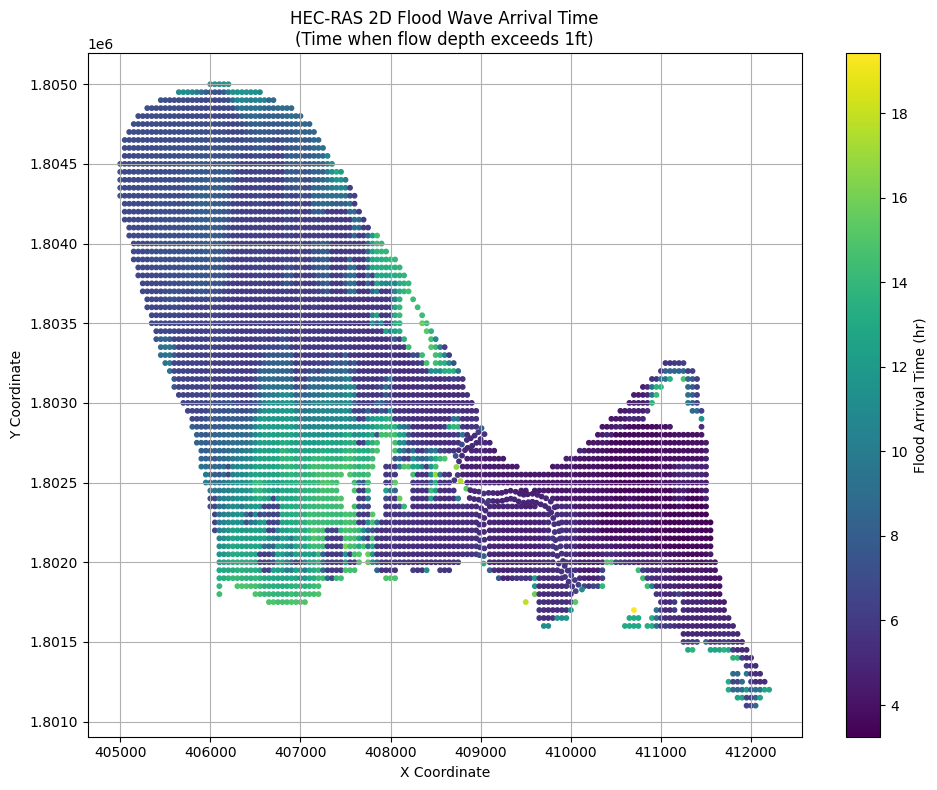

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def compute_flood_arrival_time(depth_array, time_array, threshold=1.0):
    """
    For each cell, find the first time (in hours) when the depth meets or exceeds a threshold.
    
    Parameters:
      depth_array : np.ndarray
          2D array of shape (n_time, n_cells) containing depth values.
      time_array : np.ndarray
          1D array of shape (n_time,) with corresponding time stamps (in hours).
      threshold : float, optional
          Depth threshold to indicate flood arrival (default is 1.0 ft).
          
    Returns:
      flood_times : np.ndarray
          1D array (length = n_cells) with the flood arrival time for each cell.
          If a cell never reaches the threshold, its value is set to np.nan.
    """
    # Create a boolean array where True indicates depth >= threshold.
    condition = depth_array >= threshold
    n_time, n_cells = depth_array.shape
    # Check for each cell if any time meets the condition.
    has_arrival = condition.any(axis=0)
    # np.argmax returns the first index where the condition is True (or 0 if never True)
    first_idx = np.argmax(condition, axis=0)
    
    # Prepare the output array.
    flood_times = np.empty(n_cells, dtype=float)
    for j in range(n_cells):
        if has_arrival[j]:
            flood_times[j] = time_array[first_idx[j]]
        else:
            flood_times[j] = np.nan
    return flood_times

# Set the file path for the HEC-RAS HDF5 file.
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"

# Load HEC-RAS data: water surface elevation, time stamps, minimum cell elevation, and cell centers.
with h5py.File(file_path, "r") as f:
    # Water Surface Elevation (WSE): shape (289, 5765)
    wse = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][:]
    # Time stamps: shape (289,), stored as bytes, e.g., b'02JAN1900 12:05:00'
    time_stamps_raw = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][:]
    # Minimum cell elevation: shape (5765,)
    cell_min_elev = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][:]
    # Cell center coordinates for plotting: shape (5765, 2)
    coords = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][:]

# Convert time stamps from bytes to datetime objects and then to hours relative to the first time stamp.
time_format = "%d%b%Y %H:%M:%S"
# Decode bytes to string if needed
time_stamps_str = [ts.decode("utf-8") if isinstance(ts, bytes) else ts for ts in time_stamps_raw]
# Parse strings into datetime objects
time_parsed = np.array([datetime.strptime(ts, time_format) for ts in time_stamps_str])
# Calculate hours offset relative to the first timestamp
base_time = time_parsed[0]
time_hours = np.array([(t - base_time).total_seconds() / 3600.0 for t in time_parsed])

# Compute flow depth by subtracting the minimum cell elevation from the WSE.
# Broadcasting is used so that cell_min_elev (shape (5765,)) is subtracted from each time step.
depth = wse - cell_min_elev

# Calculate flood arrival times for each cell (first time when depth >= 1 ft).
flood_arrival_times = compute_flood_arrival_time(depth, time_hours, threshold=1.0)

# Save the computed flood arrival times back into the HDF5 file.
with h5py.File(file_path, "r+") as f:
    # Overwrite existing dataset if it exists.
    if "time_to_1ft" in f:
        del f["time_to_1ft"]
    f.create_dataset("time_to_1ft", data=flood_arrival_times, dtype="float64")
    print("Flood arrival times ('time_to_1ft') saved to the HEC-RAS HDF5 file.")

# Prepare spatial coordinates for plotting.
x_coords = coords[:, 0]
y_coords = coords[:, 1]

# Create a scatter plot of the flood wave arrival times.
plt.figure(figsize=(10, 8))
sc = plt.scatter(x_coords, y_coords, c=flood_arrival_times, cmap="viridis", s=10)
plt.colorbar(sc, label="Flood Arrival Time (hr)")
plt.title("HEC-RAS 2D Flood Wave Arrival Time\n(Time when flow depth exceeds 1ft)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.tight_layout()
plt.show()


# OPTION 4: RAS 2D Time of Max WSEL

'Assuming the notebook has been run and the xarrays above are present, add a code cell that will find the timestamp of the max wsel of each cell, calculate time_to_max_wsel and map it. 




In [14]:
# Insert Code Here

Flood arrival times based on maximum WSE ('time_to_max_wsel') saved to the HEC-RAS HDF5 file.


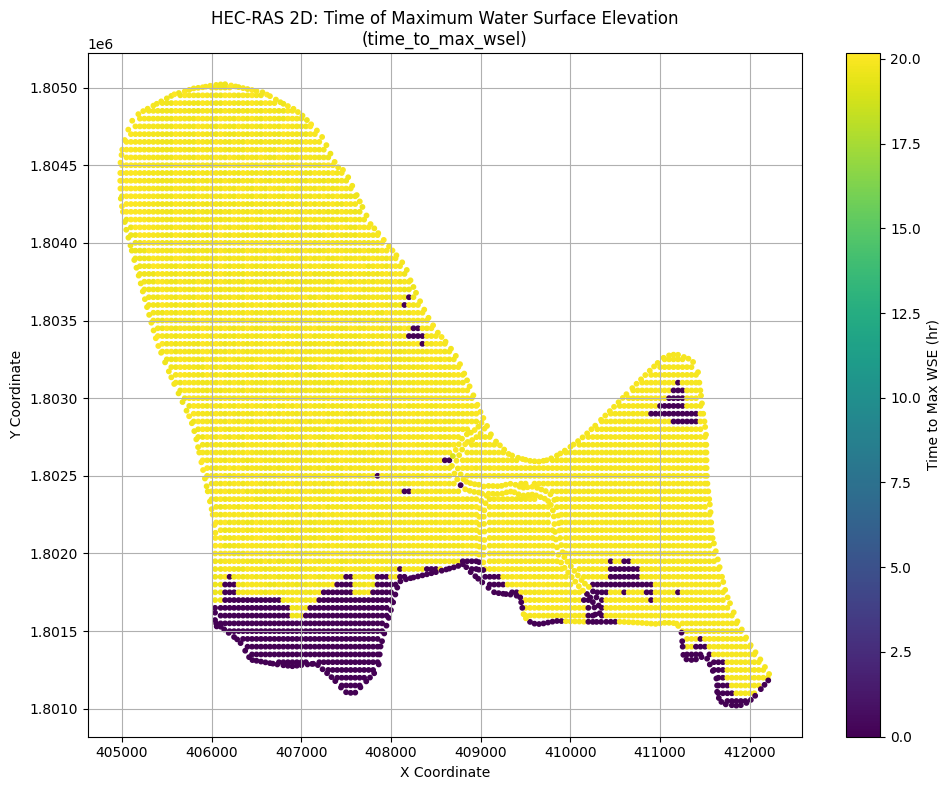

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set the file path for the HEC-RAS HDF5 file.
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"

# Load HEC-RAS data: water surface elevation, time stamps, and cell center coordinates.
with h5py.File(file_path, "r") as f:
    # Water Surface Elevation (WSE): shape (289, 5765)
    wse = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][:]
    # Time stamps: shape (289,), stored as bytes, e.g., b'02JAN1900 12:05:00'
    time_stamps_raw = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][:]
    # Cell center coordinates: shape (5765, 2)
    coords = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][:]

# Convert time stamps from bytes to datetime objects and then to hours relative to the first timestamp.
time_format = "%d%b%Y %H:%M:%S"
time_stamps_str = [ts.decode("utf-8") if isinstance(ts, bytes) else ts for ts in time_stamps_raw]
time_parsed = np.array([datetime.strptime(ts, time_format) for ts in time_stamps_str])
base_time = time_parsed[0]
time_hours = np.array([(t - base_time).total_seconds() / 3600.0 for t in time_parsed])

# Compute the index of maximum water surface elevation for each cell.
# wse is of shape (n_time, n_cells) where n_time=289 and n_cells=5765.
max_idx = np.argmax(wse, axis=0)  # Shape: (5765,)

# For each cell, assign the corresponding time (in hours) of maximum water surface elevation.
time_to_max_wsel = time_hours[max_idx]

# Save the computed "time_to_max_wsel" back into the HDF5 file.
with h5py.File(file_path, "r+") as f:
    # Delete the dataset if it already exists.
    if "time_to_max_wsel" in f:
        del f["time_to_max_wsel"]
    f.create_dataset("time_to_max_wsel", data=time_to_max_wsel, dtype="float64")
    print("Flood arrival times based on maximum WSE ('time_to_max_wsel') saved to the HEC-RAS HDF5 file.")

# Prepare spatial coordinates for plotting.
x_coords = coords[:, 0]
y_coords = coords[:, 1]

# Create a scatter plot of the time of maximum WSE for each cell.
plt.figure(figsize=(10, 8))
sc = plt.scatter(x_coords, y_coords, c=time_to_max_wsel, cmap="viridis", s=10)
plt.colorbar(sc, label="Time to Max WSE (hr)")
plt.title("HEC-RAS 2D: Time of Maximum Water Surface Elevation\n(time_to_max_wsel)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.tight_layout()
plt.show()


# Exporting Data to Other Formats

`Provide a comprehensive list of file formats that can be used to export the data in this notebook.  Favor free and open source solutions.`

Below is a comprehensive list of free and open source file formats you can consider for exporting data from this notebook. The list is organized by category:

---

**Tabular and Structured Data Formats**

- **CSV (Comma-Separated Values):**  
  A plain text format widely supported for tabular data. It’s simple to create and parse using libraries such as Pandas.

- **TSV (Tab-Separated Values):**  
  Similar to CSV, but uses tabs as delimiters. Useful when your data contains commas.

- **JSON (JavaScript Object Notation):**  
  A lightweight text-based format that supports hierarchical data structures. It is highly portable and human-readable.

- **XML (eXtensible Markup Language):**  
  A flexible text-based format for structured data exchange that is widely used in many open source projects.

- **YAML:**  
  A human-friendly data serialization standard often used for configuration files and data exchange.

- **SQLite:**  
  A self-contained, file-based SQL database engine. It is a good choice for exporting relational data and can be managed with Python’s built-in SQLite library.

---

**Scientific Data Formats**

- **netCDF (Network Common Data Form):**  
  Designed for multidimensional scientific data (e.g., temperature, pressure). It is widely used in the earth sciences and is fully open source.

- **Parquet:**  
  A columnar storage file format optimized for large-scale data processing. Supported by Pandas and Apache Arrow, it’s ideal for efficient data analytics.

- **Feather:**  
  A fast, lightweight binary columnar storage format that supports interoperability between Python (via Pandas) and R.

- **HDF5 (Hierarchical Data Format):**  
  Already used in this notebook, HDF5 is excellent for storing large, complex datasets with a hierarchical structure. Data can be re-exported or shared with other applications.

---

**Geospatial Data Formats**

- **GeoJSON:**  
  An open standard format for encoding geographic data structures in JSON. It is widely used in web mapping and GIS applications.

- **Shapefile:**  
  A popular, open format for geospatial vector data. Although it has some limitations (like file size and attribute constraints), it is supported by many GIS tools.

- **KML/KMZ:**  
  XML-based formats for geospatial data primarily used by Google Earth. They are free and open standards for representing geographic information.

---

**Graphical and Visualization Formats**

- **PNG (Portable Network Graphics):**  
  A lossless raster graphics format ideal for exporting plots and images.

- **JPEG (Joint Photographic Experts Group):**  
  A commonly used lossy compression format for digital images, useful for photographs or non-critical graphics.

- **SVG (Scalable Vector Graphics):**  
  An XML-based vector image format that is resolution independent and perfect for scalable graphics and plots.

- **PDF (Portable Document Format):**  
  A versatile document format suitable for exporting figures or reports with high-quality print outputs.

---

**Serialization Formats**

- **Pickle:**  
  A Python-specific binary format for serializing objects. While convenient, it is not cross-language and should be used with caution when sharing data outside of Python environments.

- **Arrow IPC:**  
  A format provided by Apache Arrow for fast, in-memory data exchange between systems. It’s particularly useful in modern data processing pipelines.

---

These formats cover a wide range of use cases—from simple tabular data and scientific datasets to geospatial information and visualizations—while favoring free and open source standards.

https://chatgpt.com/share/67f2b8ed-e4c0-8010-9ff9-06a7c2e39cd0